# Which Gender Commits More Crimes on a During Full Moon

In [2]:
#First import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import CSV file

crime = pd.read_csv('clean_data/KCPD_Crime_Data_2017_clean.csv')

moon = pd.read_csv('clean_data/Moon_Data_2017_cleaned.csv')

In [4]:
crime.head()

,Date,From_Time,Offense,Description,Beat,Address,City,Zip Code,Race,Sex,Age,Firearm Used Flag,Location
0,2017-10-04,16:00,690,Stealing All Other,221.0,400 W 58 ST,KANSAS CITY,64113,U,U,NaN,N,"400 W 58 ST\nKANSAS CITY 64113\n(39.022397, -9..."
1,2017-03-20,11:30,630,Stealing Shoplifting,332.0,3500 PROSPECT AV,KANSAS CITY,64127,NaN,NaN,NaN,N,3500 PROSPECT AV\nKANSAS CITY 64127\n
2,2017-01-15,2:35,1850,Possession of Drug E,422.0,N GREEN HILLS RD and NW OLD TIFFANY SPRINGS,KANSAS CITY,64152,B,M,23.0,N,N NW GREEN HILLS RD\nKANSAS CITY 64152\n
3,2017-01-05,11:40,1849,Possession/Sale/Dist,122.0,1100 TROOST AV,KANSAS CITY,64106,NaN,NaN,NaN,N,"1100 TROOST AV\nKANSAS CITY 64106\n(39.10068, ..."
4,2017-01-27,21:25,670,Stealing from Buildi,324.0,4800 E 24 ST,KANSAS CITY,64127,B,F,38.0,N,"4800 E 24 ST\nKANSAS CITY 64127\n(39.08209, -9..."


In [5]:
crime['Sex'].isnull().sum()

17987

In [6]:
crime = crime.dropna(axis = 0, subset=['Sex'])

In [7]:
crime['Sex'].isnull().sum()

0

In [8]:
crime 

,Date,From_Time,Offense,Description,Beat,Address,City,Zip Code,Race,Sex,Age,Firearm Used Flag,Location
0,2017-10-04,16:00,690,Stealing All Other,221.0,400 W 58 ST,KANSAS CITY,64113,U,U,NaN,N,"400 W 58 ST\nKANSAS CITY 64113\n(39.022397, -9..."
2,2017-01-15,2:35,1850,Possession of Drug E,422.0,N GREEN HILLS RD and NW OLD TIFFANY SPRINGS,KANSAS CITY,64152,B,M,23.0,N,N NW GREEN HILLS RD\nKANSAS CITY 64152\n
4,2017-01-27,21:25,670,Stealing from Buildi,324.0,4800 E 24 ST,KANSAS CITY,64127,B,F,38.0,N,"4800 E 24 ST\nKANSAS CITY 64127\n(39.08209, -9..."
6,2017-12-07,16:00,650,Stealing Auto Parts/,122.0,1100 WOODLAND AV,KANSAS CITY,64106,B,F,34.0,N,1100 WOODLAND AV\nKANSAS CITY 64106\n(39.10045...
7,2017-05-02,0:03,2100,Driving Under Influe,241.0,E 68 ST and OLIVE ST,KANSAS CITY,64132,B,M,25.0,N,68 ST and OLIVE ST\nKANSAS CITY 64132\n
8,2017-04-21,15:00,2601,Misc Violation,323.0,6600 E 23 TR,KANSAS CITY,64127,U,U,NaN,N,6600 E 23 TR\nKANSAS CITY 64127\n
9,2017-05-06,19:01,831,Intimidation,113.0,1700 MAIN ST,KANSAS CITY,64105,W,M,26.0,N,"1700 MAIN ST\nKANSAS CITY 64105\n(39.093261, -..."
10,2017-04-26,17:30,2604,False Information to,345.0,11600 E US 40 HW,KANSAS CITY,64133,B,M,NaN,N,11600 E US\nHW KANSAS CITY 64133\n
11,2017-10-27,15:00,2402,Disorderly Conduct,542.0,E BANNISTER RD and NEWTON DR,KANSAS CITY,64134,B,F,42.0,N,E BANNISTER RD\nKANSAS CITY 64134\n
12,2017-06-18,21:05,401,Aggravated Assault (,126.0,LINWOOD and EUCLID AV,KANSAS CITY,64109,B,M,NaN,Y,LINWOOD\nKANSAS CITY 64109\n


In [9]:
crime['Sex'].value_counts()

M    52704
F    35979
U    25171
*        3
Name: Sex, dtype: int64

In [10]:
#delete unknown gender type

crime = crime[crime.Sex != 'U']

In [11]:
crime['Sex'].value_counts()

M    52704
F    35979
*        3
Name: Sex, dtype: int64

In [12]:
#delete * gender type

crime = crime[crime.Sex != '*']

In [13]:
#Now the crime data only has M and F
crime['Sex'].value_counts()

M    52704
F    35979
Name: Sex, dtype: int64

In [14]:
crime

,Date,From_Time,Offense,Description,Beat,Address,City,Zip Code,Race,Sex,Age,Firearm Used Flag,Location
2,2017-01-15,2:35,1850,Possession of Drug E,422.0,N GREEN HILLS RD and NW OLD TIFFANY SPRINGS,KANSAS CITY,64152,B,M,23.0,N,N NW GREEN HILLS RD\nKANSAS CITY 64152\n
4,2017-01-27,21:25,670,Stealing from Buildi,324.0,4800 E 24 ST,KANSAS CITY,64127,B,F,38.0,N,"4800 E 24 ST\nKANSAS CITY 64127\n(39.08209, -9..."
6,2017-12-07,16:00,650,Stealing Auto Parts/,122.0,1100 WOODLAND AV,KANSAS CITY,64106,B,F,34.0,N,1100 WOODLAND AV\nKANSAS CITY 64106\n(39.10045...
7,2017-05-02,0:03,2100,Driving Under Influe,241.0,E 68 ST and OLIVE ST,KANSAS CITY,64132,B,M,25.0,N,68 ST and OLIVE ST\nKANSAS CITY 64132\n
9,2017-05-06,19:01,831,Intimidation,113.0,1700 MAIN ST,KANSAS CITY,64105,W,M,26.0,N,"1700 MAIN ST\nKANSAS CITY 64105\n(39.093261, -..."
10,2017-04-26,17:30,2604,False Information to,345.0,11600 E US 40 HW,KANSAS CITY,64133,B,M,NaN,N,11600 E US\nHW KANSAS CITY 64133\n
11,2017-10-27,15:00,2402,Disorderly Conduct,542.0,E BANNISTER RD and NEWTON DR,KANSAS CITY,64134,B,F,42.0,N,E BANNISTER RD\nKANSAS CITY 64134\n
12,2017-06-18,21:05,401,Aggravated Assault (,126.0,LINWOOD and EUCLID AV,KANSAS CITY,64109,B,M,NaN,Y,LINWOOD\nKANSAS CITY 64109\n
13,2017-05-09,18:27,2655,Trespassing,333.0,4400 E 39 ST,KANSAS CITY,64130,B,M,48.0,N,4400 E 39 ST\nKANSAS CITY 64130\n
14,2017-09-30,17:55,2655,Trespassing,132.0,00 W 38 ST,KANSAS CITY,64111,W,M,40.0,N,00 W 38 ST\nKANSAS CITY 64111\n


In [15]:
#split the dataset by gender

female = crime.loc[crime['Sex']=='F']

female.head(3)

,Date,From_Time,Offense,Description,Beat,Address,City,Zip Code,Race,Sex,Age,Firearm Used Flag,Location
4,2017-01-27,21:25,670,Stealing from Buildi,324.0,4800 E 24 ST,KANSAS CITY,64127,B,F,38.0,N,"4800 E 24 ST\nKANSAS CITY 64127\n(39.08209, -9..."
6,2017-12-07,16:00,650,Stealing Auto Parts/,122.0,1100 WOODLAND AV,KANSAS CITY,64106,B,F,34.0,N,1100 WOODLAND AV\nKANSAS CITY 64106\n(39.10045...
11,2017-10-27,15:00,2402,Disorderly Conduct,542.0,E BANNISTER RD and NEWTON DR,KANSAS CITY,64134,B,F,42.0,N,E BANNISTER RD\nKANSAS CITY 64134\n


In [16]:
#Female and crime only dataset
femalebydate = female.groupby(['Date','Sex']).count().reset_index()
femalebydate.head(3)

,Date,Sex,From_Time,Offense,Description,Beat,Address,City,Zip Code,Race,Age,Firearm Used Flag,Location
0,2017-01-01,F,131,131,131,131,131,131,131,131,110,131,131
1,2017-01-02,F,78,78,78,78,78,78,78,78,70,78,78
2,2017-01-03,F,74,76,76,74,76,76,76,76,60,76,76


In [17]:
#Do the same for male to get a male only dataset

#split the dataset by gender

male = crime.loc[crime['Sex']=='M']

male.head(3)

,Date,From_Time,Offense,Description,Beat,Address,City,Zip Code,Race,Sex,Age,Firearm Used Flag,Location
2,2017-01-15,2:35,1850,Possession of Drug E,422.0,N GREEN HILLS RD and NW OLD TIFFANY SPRINGS,KANSAS CITY,64152,B,M,23.0,N,N NW GREEN HILLS RD\nKANSAS CITY 64152\n
7,2017-05-02,0:03,2100,Driving Under Influe,241.0,E 68 ST and OLIVE ST,KANSAS CITY,64132,B,M,25.0,N,68 ST and OLIVE ST\nKANSAS CITY 64132\n
9,2017-05-06,19:01,831,Intimidation,113.0,1700 MAIN ST,KANSAS CITY,64105,W,M,26.0,N,"1700 MAIN ST\nKANSAS CITY 64105\n(39.093261, -..."


In [18]:
#Male and crime only dataset
malebydate = male.groupby(['Date','Sex']).count().reset_index()
malebydate.head(3)

,Date,Sex,From_Time,Offense,Description,Beat,Address,City,Zip Code,Race,Age,Firearm Used Flag,Location
0,2017-01-01,M,179,179,179,179,179,179,179,179,149,179,179
1,2017-01-02,M,139,139,139,139,139,139,139,139,109,139,139
2,2017-01-03,M,139,139,139,139,139,139,139,139,98,139,139


In [19]:
#now drop extra columns

femalebydatenew  = femalebydate[['Sex','Offense']].copy()
femalebydatenew.head(3)




,Sex,Offense
0,F,131
1,F,78
2,F,76


In [20]:

#femalebydatenew = femalebydatenew.rename(columns={"Date":"Datedrop"})
#femalebydatenew.head(3)

In [21]:
#do the same for male

malebydatenew  = malebydate[['Sex','Offense']].copy()

malebydatenew.head(3)

,Sex,Offense
0,M,179
1,M,139
2,M,139


# Merge the Moon Data and Gender Data on Date

In [22]:
femalemoon = pd.concat([moon, femalebydatenew], axis=1)
femalemoon.head(3)

,Date,Moon Phase,Illumination,Sex,Offense
0,2017-01-01,Waxing Crescent,10%,F,131
1,2017-01-02,Waxing Crescent,17%,F,78
2,2017-01-03,Waxing Crescent,26%,F,76


In [23]:
#Do the same for male

malemoon = pd.concat([moon, malebydatenew], axis=1)
malemoon.head(3)

,Date,Moon Phase,Illumination,Sex,Offense
0,2017-01-01,Waxing Crescent,10%,M,179
1,2017-01-02,Waxing Crescent,17%,M,139
2,2017-01-03,Waxing Crescent,26%,M,139


In [24]:
#Group female data by moon phase

In [25]:
femalebyphase = femalemoon.groupby(['Moon Phase']).sum().reset_index()
femalebyphase

,Moon Phase,Offense
0,First Quarter,1152
1,Full Moon,1177
2,Last Quarter,1127
3,New Moon,1250
4,Waning Crescent,7575
5,Waning Gibbous,7721
6,Waxing Crescent,7438
7,Waxing Gibbous,7868


In [26]:
femalenew = femalebyphase.rename(columns={"Offense":"Female"})
femalenew.head(3)

,Moon Phase,Female
0,First Quarter,1152
1,Full Moon,1177
2,Last Quarter,1127


In [27]:
#Group male data by moon phase

malebyphase = malemoon.groupby(['Moon Phase']).sum().reset_index()
malebyphase

,Moon Phase,Offense
0,First Quarter,1519
1,Full Moon,1745
2,Last Quarter,1758
3,New Moon,1864
4,Waning Crescent,11041
5,Waning Gibbous,11336
6,Waxing Crescent,10902
7,Waxing Gibbous,11866


In [28]:
malenew = malebyphase.rename(columns={"Offense":"Male"})
malenew.head(3)

,Moon Phase,Male
0,First Quarter,1519
1,Full Moon,1745
2,Last Quarter,1758


In [29]:
malenewnew  = malenew[['Male']].copy()
malenewnew.head(3)


,Male
0,1519
1,1745
2,1758


In [30]:
alldata = pd.concat([malenewnew, femalenew], axis=1)
alldata.head(10)

,Male,Moon Phase,Female
0,1519,First Quarter,1152
1,1745,Full Moon,1177
2,1758,Last Quarter,1127
3,1864,New Moon,1250
4,11041,Waning Crescent,7575
5,11336,Waning Gibbous,7721
6,10902,Waxing Crescent,7438
7,11866,Waxing Gibbous,7868


In [31]:

x_labels = ['First Quarter',
               'Full Moon',
               'Last Quarter',
               'New Moon',
               'Waning Crescent',
               'Waning Gibbous',
               'Waxing Crescent',
               'Waxing Gibbous']

/Users/mcopple/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


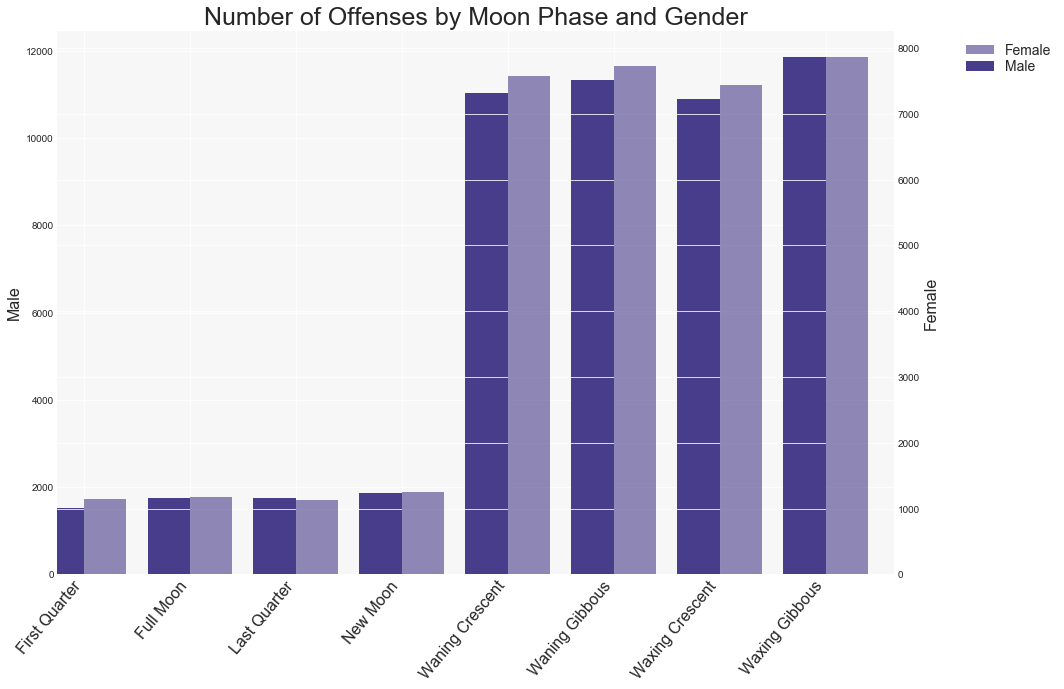

In [33]:
fig = plt.figure() # Create matplotlib figure

sns.set_style("darkgrid", {"axes.facecolor": ".97"})


plt.title("Number of Offenses by Moon Phase and Gender", fontsize = 25)

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

alldata.Male.plot(kind='bar', color='DarkSlateBlue',alpha=1, ax=ax, width=width, position=1)
alldata.Female.plot(kind='bar', color='DarkSlateBlue',alpha=.6, ax=ax2, width=width, position=0)

ax.set_ylabel('Male', fontsize=16)
ax2.set_ylabel('Female',fontsize=16)
                             
ax.set_xticklabels(x_labels,rotation=50,fontsize =16, horizontalalignment='right')

fig = plt.gcf()
fig.set_size_inches(15,10)

ax2.legend(bbox_to_anchor=(1.07,1), loc="upper left",fontsize = 14)
ax.legend(bbox_to_anchor=(1.07,.97), loc="upper left", fontsize = 14)

#save an image of the plot to the output folder
plt.savefig('Pics/Gender.png')


#show plot
plt.show()

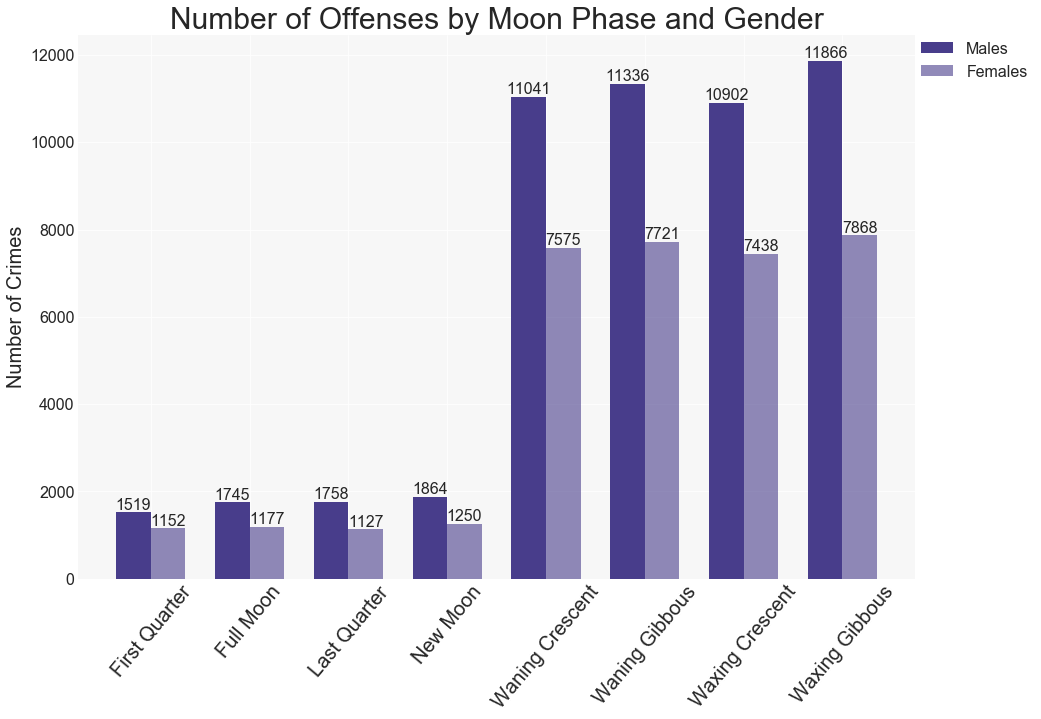

In [35]:
"""
========
Barchart
========

A bar plot with errorbars and height labels on individual bars
"""
sns.set_style("darkgrid", {"axes.facecolor": ".97"})

N = 8
crimes_by_men = alldata['Male']


ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(15,10))
rects1 = ax.bar(ind, crimes_by_men, width, color='darkslateblue', alpha=1.0, label='Males')

crimes_by_women = alldata['Female']

rects2 = ax.bar(ind + width, crimes_by_women, width, color='darkslateblue', alpha=0.6,
               label='Females')

# add some text for labels, title and axes ticks

ax.set_ylabel('Number of Crimes', fontsize=20)
ax.set_title('Number of Offenses by Moon Phase and Gender', fontsize=30)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(x_labels, rotation=50, fontsize=20)
y_ticks=['0','2000', '4000', '6000', '8000', '10000', '12000']
ax.set_yticklabels(y_ticks, rotation=0, fontsize=16)
ax.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0., prop={'size': 16}, markerscale=1.5)


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height + .02,
                '%d' % int(height),
                ha='center', va='bottom', fontsize = 16)

autolabel(rects1)
autolabel(rects2)

#save an image of the plot to the output folder
plt.savefig('Pics/Gender.png')


plt.show()
